In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mp
import matplotlib.pyplot as plt
import math as m
import sympy as smp
from IPython.display import display as disp
import lablib as ll
%matplotlib inline

In [2]:
data = {}
columns = {}
aux = {}
experiments = ["step_1", "step_2", "step_3_1", "step_3_2"]

constants = ll.read_csv("constants.csv")

for e in experiments:
    columns[e] = ll.read_csv("measurements/%s.csv" % e)
    data[e] = ll.varlist()
    ll.add(data[e],
           constants,
           ll.read_csv("constants/%s.csv" % e))

#for e in experiments:
#    disp("Data for experiment %s:" % e, columns[e])
#    
#for e in experiments:
#    disp("Constants for experiment %s:" % e, data[e])

Выполняем предварительные расчёты: $P = P_{изм} * cos(\alpha) * P_{коэф}$, $Q = \frac{V}{t}$, $L = L_2 - L_1$.

In [3]:
for e in experiments:
    disp("Data for %s (d = %f ± %f):" % (e, data[e].Value["d"], data[e].Error["d"]))
    
    ll.compute(name = "P",
               expr = lambda P_m, P_angle, P_coef: P_m * P_angle * P_coef,
               data = data[e],
               columns = columns[e])
    
    ll.compute(name = "Q",
               expr = lambda V, t: V / t,
               data = data[e],
               columns = columns[e])
    
    ll.compute(name = "L",
               expr = lambda L_1, L_2: L_2 - L_1,
               data = data[e],
               columns = columns[e],
               aux = { "L_1": { "Error": "Error_L_1_2" },
                       "L_2": { "Error": "Error_L_1_2" } })

    disp(data[e], columns[e])

'Data for step_1 (d = 0.003575 ± 0.000025):'

,Value,Error,ErrorRel
P_coef,9.806650,0.000005,0.00%
P_angle,0.200000,0.005000,2.50%
d,0.003575,0.000025,0.70%
L_1,0.409000,0.000500,0.12%
L_2,0.809000,0.000500,0.06%
L,0.400000,0.000707,0.18%


,P_m,Error_P_m,ErrorRel_P_m,V,Error_V,ErrorRel_V,t,Error_t,ErrorRel_t,P,Error_P,ErrorRel_P,Q,Error_Q,ErrorRel_Q
0,10,0.500000,5.00%,0.001000,0.000050,5.00%,68,1,1.47%,19.613300,1.096417,5.59%,0.000015,0.000001,5.21%
1,20,0.500000,2.50%,0.002000,0.000050,2.50%,68,1,1.47%,39.226600,1.386870,3.54%,0.000029,0.000001,2.90%
2,30,0.500000,1.67%,0.003000,0.000050,1.67%,70,1,1.43%,58.839900,1.767919,3.00%,0.000043,0.000001,2.20%
3,40,0.500000,1.25%,0.004000,0.000050,1.25%,73,1,1.37%,78.453200,2.192834,2.80%,0.000055,0.000001,1.85%
4,50,0.500000,1.00%,0.005000,0.000050,1.00%,77,1,1.30%,98.066500,2.640521,2.69%,0.000065,0.000001,1.64%
5,60,0.500000,0.83%,0.006000,0.000100,1.67%,81,1,1.23%,117.679800,3.101135,2.64%,0.000074,0.000002,2.07%
6,70,1.000000,1.43%,0.007000,0.000100,1.43%,87,1,1.15%,137.293100,3.953187,2.88%,0.000080,0.000001,1.83%
7,80,1.000000,1.25%,0.008000,0.000100,1.25%,95,1,1.05%,156.906400,4.385667,2.80%,0.000084,0.000001,1.63%
8,90,1.000000,1.11%,0.009000,0.000100,1.11%,100,1,1.00%,176.519700,4.829215,2.74%,0.000090,0.000001,1.49%
9,100,1.000000,1.00%,0.010000,0.000100,1.00%,104,1,0.96%,196.133000,5.281043,2.69%,0.000096,0.000001,1.39%


'Data for step_2 (d = 0.003575 ± 0.000025):'

,Value,Error,ErrorRel
P_coef,9.806650,0.000005,0.00%
P_angle,0.200000,0.005000,2.50%
V,0.005000,0.000050,1.00%
t,72.000000,1.000000,1.39%
d,0.003575,0.000025,0.70%
Q,0.000069,0.000001,1.71%


,L_1,L_2,Error_L_1_2,P_m,Error_P_m,ErrorRel_P_m,P,Error_P,ErrorRel_P,L,Error_L,ErrorRel_L
0,0,0.109000,0.000500,37,0.050000,0.14%,72.569210,1.816879,2.50%,0.109000,0.000707,0.65%
1,0,0.409000,0.000500,78,0.050000,0.06%,152.983740,3.825851,2.50%,0.409000,0.000707,0.17%
2,0,0.709000,0.000500,135,0.050000,0.04%,264.779550,6.620215,2.50%,0.709000,0.000707,0.10%
3,0,1.209000,0.000500,197,0.050000,0.03%,386.382010,9.660048,2.50%,1.209000,0.000707,0.06%


'Data for step_3_1 (d = 0.005250 ± 0.000250):'

,Value,Error,ErrorRel
P_coef,9.806650,0.000005,0.00%
P_angle,0.200000,0.005000,2.50%
L_1,0.707000,0.000500,0.07%
L_2,1.207000,0.000500,0.04%
d,0.005250,0.000250,4.76%
L,0.500000,0.000707,0.14%


,P_m,Error_P_m,ErrorRel_P_m,V,Error_V,ErrorRel_V,t,Error_t,ErrorRel_t,P,Error_P,ErrorRel_P,Q,Error_Q,ErrorRel_Q
0,20,0.500000,2.50%,0.005000,0.000100,2.00%,60,1,1.67%,39.226600,1.386870,3.54%,0.000083,0.000002,2.60%
1,40,0.500000,1.25%,0.010000,0.000100,1.00%,70,1,1.43%,78.453200,2.192834,2.80%,0.000143,0.000002,1.74%
2,60,0.500000,0.83%,0.010000,0.000100,1.00%,60,1,1.67%,117.679800,3.101135,2.64%,0.000167,0.000003,1.94%
3,80,0.500000,0.62%,0.010000,0.000100,1.00%,54,1,1.85%,156.906400,4.043385,2.58%,0.000185,0.000004,2.10%


'Data for step_3_2 (d = 0.003000 ± 0.000100):'

,Value,Error,ErrorRel
P_coef,9.806650,0.000005,0.00%
P_angle,0.200000,0.005000,2.50%
L_1,0.310000,0.005000,1.61%
L_2,0.610000,0.005000,0.82%
d,0.003000,0.000100,3.33%
L,0.300000,0.007071,2.36%


,P_m,Error_P_m,ErrorRel_P_m,V,Error_V,ErrorRel_V,t,Error_t,ErrorRel_t,P,Error_P,ErrorRel_P,Q,Error_Q,ErrorRel_Q
0,20,0.500000,2.50%,0.001000,0.000050,5.00%,70,1,1.43%,39.226600,1.386870,3.54%,0.000014,0.000001,5.20%
1,40,0.500000,1.25%,0.002000,0.000050,2.50%,72,1,1.39%,78.453200,2.192834,2.80%,0.000028,0.000001,2.86%
2,60,0.500000,0.83%,0.003000,0.000050,1.67%,75,1,1.33%,117.679800,3.101135,2.64%,0.000040,0.000001,2.13%
3,80,0.500000,0.62%,0.004000,0.000050,1.25%,83,1,1.20%,156.906400,4.043385,2.58%,0.000048,0.000001,1.74%


Строим зависимость $P = P(Q)$ и определяем линейные участки, соответствующие ламинарному течению газа.

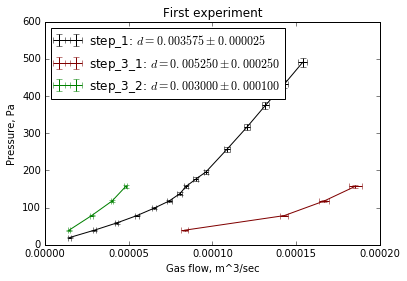

In [4]:
plt.title("First experiment")
plt.xlabel("Gas flow, m^3/sec")
plt.ylabel("Pressure, Pa")

experiments_1 = ["step_1", "step_3_1", "step_3_2"]
colors_1 = ["black", "#800000", "#008000"]

for e, c in zip(experiments_1, colors_1):
    plt.errorbar(x = columns[e].Q,
                 y = columns[e].P,
                 xerr = columns[e].Error_Q,
                 yerr = columns[e].Error_P,
                 label = "%s: $d = %f \pm %f$" % (e, data[e].Value["d"], data[e].Error["d"]),
                 color = c)

plt.legend(loc = "best")

In [5]:
usable = {}
usable["step_1"] = 5
usable["step_3_1"] = 2
usable["step_3_2"] = 3

Выполняем приближение линейной функцией и определяем значение коэффициента $\frac{\pi r^4}{8 L \eta}$ для каждой трубки.

Initial guesses for P:
                     Value        Error  ErrorRel
poiseuille 1411790.958775 20217.669908  0.014321


'Final guesses for P:'

,Value,Error,ErrorRel
poiseuille,1420295.838291,33479.178349,2.36%


Initial guesses for P:
                    Value        Error  ErrorRel
poiseuille 513110.422660 11283.305814  0.021990


'Final guesses for P:'

,Value,Error,ErrorRel
poiseuille,518090.920191,38788.396301,7.49%


Initial guesses for P:
                     Value        Error  ErrorRel
poiseuille 2850310.234675 48060.162414  0.016861


'Final guesses for P:'

,Value,Error,ErrorRel
poiseuille,2870740.733350,52981.960043,1.85%


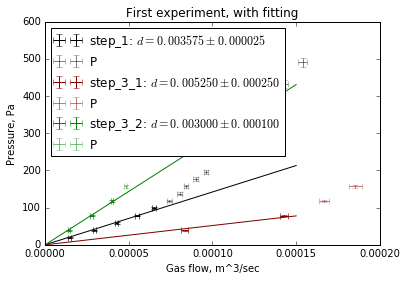

In [6]:
plt.title("First experiment, with fitting")
plt.xlabel("Gas flow, m^3/sec")
plt.ylabel("Pressure, Pa")

Q_linspace = np.linspace(0, 0.00015, 100)

for e, c in zip(experiments_1, colors_1):
    plt.errorbar(x = columns[e].Q[:usable[e]],
                 y = columns[e].P[:usable[e]],
                 xerr = columns[e].Error_Q[:usable[e]],
                 yerr = columns[e].Error_P[:usable[e]],
                 label = "%s: $d = %f \pm %f$" % (e, data[e].Value["d"], data[e].Error["d"]),
                 ls = "none",
                 color = c)

    plt.errorbar(x = columns[e].Q,
                 y = columns[e].P,
                 xerr = columns[e].Error_Q,
                 yerr = columns[e].Error_P,
                 ls = "none",
                 color = c,
                 alpha = 0.5)

    model = ll.fit2(name = "P",
                    model = lambda Q, poiseuille: Q * poiseuille,
                    x = columns[e].Q[:usable[e]],
                    y = columns[e].P[:usable[e]],
                    xerr = columns[e].Error_Q[:usable[e]],
                    yerr = columns[e].Error_P[:usable[e]],
                    data = data[e])
    
    plt.errorbar(x = Q_linspace,
                 y = model(Q_linspace),
                 color = c)

plt.legend(loc = "best")

Из полученного коэффициента в формуле Пуазейля и характеристик трубки вычисляем вязкость воздуха для каждой трубки.

<Container object of 3 artists>

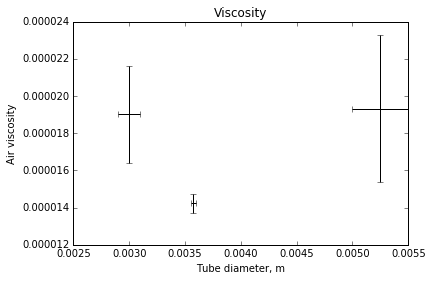

In [7]:
for e in experiments_1:
    ll.compute(name = "v",
               expr = lambda poiseuille, d, L: poiseuille * m.pi * (d/2)**4 / (8 * L),
               data = data[e],
               columns = columns[e])
    
plt.title("Viscosity")
plt.xlabel("Tube diameter, m")
plt.ylabel("Air viscosity")

plt.errorbar(x = [data[e].Value["d"] for e in experiments_1],
             y = [data[e].Value["v"] for e in experiments_1],
             xerr = [data[e].Error["d"] for e in experiments_1],
             yerr = [data[e].Error["v"] for e in experiments_1],
             linestyle = "none",
             color = "black")

In [8]:
for e in experiments_1:
    disp("Results for %f:" % data[e].Value["d"],
         data[e].loc[["d", "v", "L_1", "L"]])

'Results for 0.003575:'

,Value,Error,ErrorRel
d,0.003575,0.000025,0.006993
v,0.000014,0.000001,0.036622
L_1,0.409000,0.000500,0.001222
L,0.400000,0.000707,0.001768


'Results for 0.005250:'

,Value,Error,ErrorRel
d,0.005250,0.000250,0.047619
v,0.000019,0.000004,0.204667
L_1,0.707000,0.000500,0.000707
L,0.500000,0.000707,0.001414


'Results for 0.003000:'

,Value,Error,ErrorRel
d,0.003000,0.000100,0.033333
v,0.000019,0.000003,0.136653
L_1,0.310000,0.005000,0.016129
L,0.300000,0.007071,0.023570


Полученные значения вязкости:

- $d = 0.003575 м$: $\eta = (14 \pm 0.5) * 10^{-6} \frac{м^2}{сек}$
- $d = 0.005250 м$: $\eta = (19 \pm 4) * 10^{-6} \frac{м^2}{сек}$
- $d = 0.003000 м$: $\eta = (19 \pm 3) * 10^{-6} \frac{м^2}{сек}$

Теперь построим тот же график, но вычислим число Рейнольдса для каждой точки, чтобы проверить правильность выбора точки перехода в турбулентное течение.

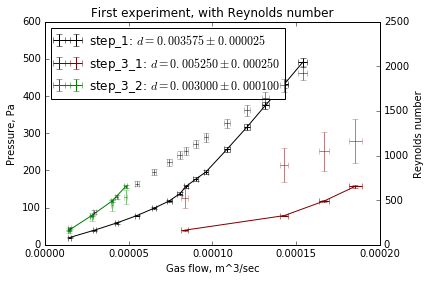

In [9]:
for e in experiments_1:
    ll.compute(name = "Re",
               expr = lambda Q, v, d: (d/2) * Q / (m.pi * (d/2)**2 * v),
               data = data[e],
               columns = columns[e])

plt.title("First experiment, with Reynolds number")
plt.xlabel("Gas flow, m^3/sec")

ax1 = plt.gca()
ax1.set_ylabel("Pressure, Pa")
ax2 = ax1.twinx()
ax2.set_ylabel("Reynolds number")

for e, c in zip(experiments_1, colors_1):
    ax2.errorbar(x = columns[e].Q,
                 y = columns[e].Re,
                 xerr = columns[e].Error_Q,
                 yerr = columns[e].Error_Re,
                 label = "%s: Reynolds number" % e,
                 color = c,
                 alpha = 0.5,
                 linestyle = "None")
    ax1.errorbar(x = columns[e].Q,
                 y = columns[e].P,
                 xerr = columns[e].Error_Q,
                 yerr = columns[e].Error_P,
                 label = "%s: $d = %f \pm %f$" % (e, data[e].Value["d"], data[e].Error["d"]),
                 color = c)

ax1.legend(loc = "best")

Ну или по-другому — вычислим число Рейнольдса для выбранной нами точки перехода.

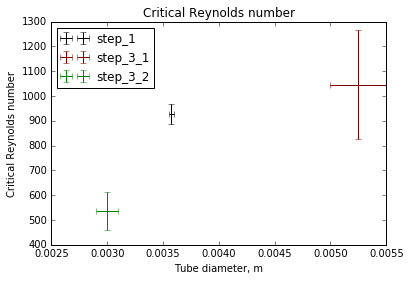

In [10]:
plt.title("Critical Reynolds number")
plt.xlabel("Tube diameter, m")
plt.ylabel("Critical Reynolds number")

for e, c in zip(experiments_1, colors_1):
    plt.errorbar(x = [data[e].Value["d"]],
                 y = [columns[e].Re[usable[e]]],
                 xerr = [data[e].Error["d"]],
                 yerr = [columns[e].Error_Re[usable[e]]],
                 label = e,
                 linestyle = "none",
                 color = c)

plt.legend(loc = "best")

Теперь построим график зависимости падения давления в трубке от координаты вдоль трубки.

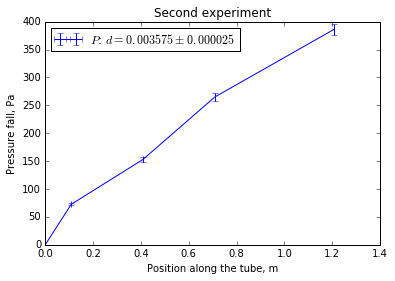

In [11]:
plt.title("Second experiment")
plt.xlabel("Position along the tube, m")
plt.ylabel("Pressure fall, Pa")

e = "step_2"
plt.errorbar(x = [0] + list(columns[e].L),
             y = [0] + list(columns[e].P),
             xerr = [0] + list(columns[e].Error_L),
             yerr = [0] + list(columns[e].Error_P),
             label = "$P$: $d = %f \pm %f$" % (data[e].Value["d"], data[e].Error["d"]))

plt.axis([0, None, 0, None])
plt.legend(loc = "best")

Также приведём результаты оценки расстояния установления ламинарного течения (по указанной оценочной формуле) и сравним с вышеприведённым графиком.

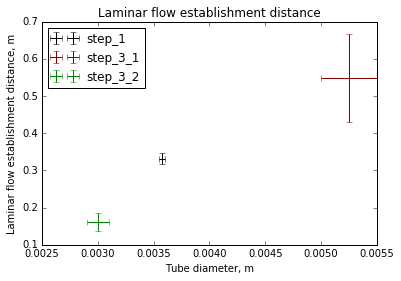

In [12]:
for e in experiments_1:
    ll.compute(name = "L_threshold",
               expr = lambda d, Re: 0.2 * (d/2) * Re,
               data = data[e],
               columns = columns[e])

plt.title("Laminar flow establishment distance")
plt.xlabel("Tube diameter, m")
plt.ylabel("Laminar flow establishment distance, m")

for e, c in zip(experiments_1, colors_1):
    plt.errorbar(x = [data[e].Value["d"]],
                 y = [columns[e].L_threshold[usable[e]]],
                 xerr = [data[e].Error["d"]],
                 yerr = [columns[e].Error_L_threshold[usable[e]]],
                 linestyle = "none",
                 label = e,
                 color = c)
                 

plt.legend(loc = "best")

Наконец, построим график в логарифмических масштабах, чтобы убедиться в выполнении закона Пуазейля.

Initial guesses for ln_k:
             Value    Error  ErrorRel
r_index  3.668542 0.449044  0.122404
offset  -2.220028 2.841195 -1.279801


'Final guesses for ln_k:'

,Value,Error,ErrorRel
r_index,3.673585,0.256388,6.98%
offset,-2.185539,1.622252,-74.23%


<Container object of 3 artists>

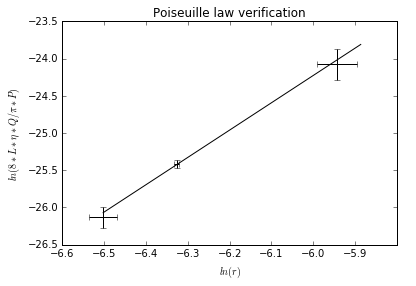

In [13]:
for e in experiments_1:
    ll.compute(name = "ln_r",
               expr = lambda d: ll.log(d/2),
               data = data[e],
               columns = columns[e])
    
    ll.compute(name = "ln_k",
               expr = lambda Q, v, L, P: ll.log(8 * L * v * Q / (m.pi * P)),
               data = data[e],
               columns = columns[e])

plt.title("Poiseuille law verification")
plt.xlabel("$ln(r)$")
plt.ylabel("$ln({8*L*\eta*Q} / {\pi*P})$")

model = ll.fit2(name = "ln_k",
                model = lambda ln_r, r_index, offset: ln_r * r_index + offset,
                x = [data[e].Value["ln_r"] for e in experiments_1],
                y = [columns[e].ln_k[usable[e]] for e in experiments_1],
                xerr = [data[e].Error["ln_r"] for e in experiments_1],
                yerr = [columns[e].Error_ln_k[usable[e]] for e in experiments_1],
                data = data[e])

ln_r_linspace = ll.linspace([data[e].Value["ln_r"] for e in experiments_1])

plt.errorbar(x = [data[e].Value["ln_r"] for e in experiments_1],
             y = [columns[e].ln_k[usable[e]] for e in experiments_1],
             xerr = [data[e].Error["ln_r"] for e in experiments_1],
             yerr = [columns[e].Error_ln_k[usable[e]] for e in experiments_1],
             linestyle = "none",
             color = "black")

plt.errorbar(x = ln_r_linspace, y = model(ln_r_linspace), color = "black")

Величина показателя степени у радиуса трубки — $3.67 \pm 0.26$.